In [11]:
import tensorflow as tf
import numpy as np
import random
from random import shuffle
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

# make a 2d array with [11 random numbers, the sum of the 11 random numbers]
def get_batch_sum():
    batch = [[]]
    total = 0
    for i in range(0,11):
        x = random.randint(1,10)
        batch[0].append([x])
        total += x
    return np.array(batch), [total*.1]


# make a 2d array wish [the sinWave function on 11 numbers in a series, the sinWave of the next number in that series]
def get_batch_sin():
    batch = [[]]
    total = 0
    xr = random.randint(1,100)
    xarray = np.linspace(0,5,11)
    for i in range(0,11):
        x=np.sin(xr+xarray[i])
        y = np.sin(xr+xarray[i] + (xarray[1]-xarray[0]))
        batch[0].append([x])
        total += x
    return np.array(batch), [y]   
        

print(get_batch_sin())
    
print('train data loaded')

(array([[[ 0.41211849],
        [-0.07515112],
        [-0.54402111],
        [-0.87969576],
        [-0.99999021],
        [-0.87545217],
        [-0.53657292],
        [-0.0663219 ],
        [ 0.42016704],
        [ 0.80378443],
        [ 0.99060736]]]), [0.93489505552468299])
train data loaded


In [8]:
with tf.variable_scope("greg", reuse=True) as scope:

    data = tf.placeholder(tf.float32, [None, 11,1]) #Number of examples, number of input, dimension of each input
    target = tf.placeholder(tf.float32, [1])
    num_hidden = 11
    cell1 = tf.nn.rnn_cell.LSTMCell(num_hidden, state_is_tuple=True)
    cell2 = tf.nn.rnn_cell.LSTMCell(num_hidden, state_is_tuple=True)
    cells=[]
    cells.append(cell1)
    cells.append(cell2)
    stacked_lstm = tf.nn.rnn_cell.MultiRNNCell(cells, state_is_tuple=True) # using multiple LSTM layers
    
    
    
    val, _ = tf.nn.dynamic_rnn(stacked_lstm, data, dtype=tf.float32)
    last = val[0,9:10,:] # this is the last 'slice' of the values from our neuralNet
    
    # add a readout layer to sum the results of the NN
    weight = tf.Variable(tf.truncated_normal([num_hidden,1]))
    bias = tf.Variable(tf.constant(0.1, shape=[1]))
    predictionLayer = tf.matmul(last, weight) + bias
    prediction = predictionLayer[0,:]
    
    # no classes used, just minimize the difference between actual and predicted
    loss = (tf.abs(target[0]-prediction))
    optimizer = tf.train.AdagradOptimizer(.01)
    train_step = optimizer.minimize(loss)
    

    # set up our session and train away!
    init_op = tf.initialize_all_variables()
    sess = tf.Session()
    sess.run(init_op)

    lossArray = []     # storing values in to arrays so we can display in graphs
    predictArray = []
    targetArray = []
    for i in range(0,2500):
        inp = get_batch_sin()
        sess.run(train_step,{data:inp[0],target:inp[1]})
        if(i%2==0):
            predict = sess.run(prediction,{data:inp[0],target:inp[1]})
            goal = sess.run(target[0],{data:inp[0],target:inp[1]})
            delta = sess.run(loss,{data:inp[0],target:inp[1]})
            lossArray.append(delta)
            predictArray.append(predict)
            targetArray.append(goal)
        if(i%100 ==0):
            delta = sess.run(loss,{data:inp[0],target:inp[1]})
            print('delta at trial ' +str(i)+': ' + str(delta))
            
    
    sess.close()

delta at trial 0: [ 0.57982272]
delta at trial 100: [ 0.03529233]
delta at trial 200: [ 0.00546312]
delta at trial 300: [ 0.02727171]
delta at trial 400: [ 0.01936102]
delta at trial 500: [ 0.01467985]
delta at trial 600: [ 0.00194806]
delta at trial 700: [ 0.01907656]
delta at trial 800: [ 0.00620002]
delta at trial 900: [ 0.00921792]
delta at trial 1000: [ 0.00347677]
delta at trial 1100: [ 0.00883049]
delta at trial 1200: [ 0.00416061]
delta at trial 1300: [ 0.00311539]
delta at trial 1400: [ 0.00434673]
delta at trial 1500: [ 0.00904194]
delta at trial 1600: [ 0.00486687]
delta at trial 1700: [ 0.00168645]
delta at trial 1800: [ 0.00373936]
delta at trial 1900: [ 0.00339702]
delta at trial 2000: [ 0.00428033]
delta at trial 2100: [ 0.00164229]
delta at trial 2200: [ 0.00718844]
delta at trial 2300: [ 0.00786418]
delta at trial 2400: [ 0.00701576]


Average delta between prediction and actual: 0.0137383


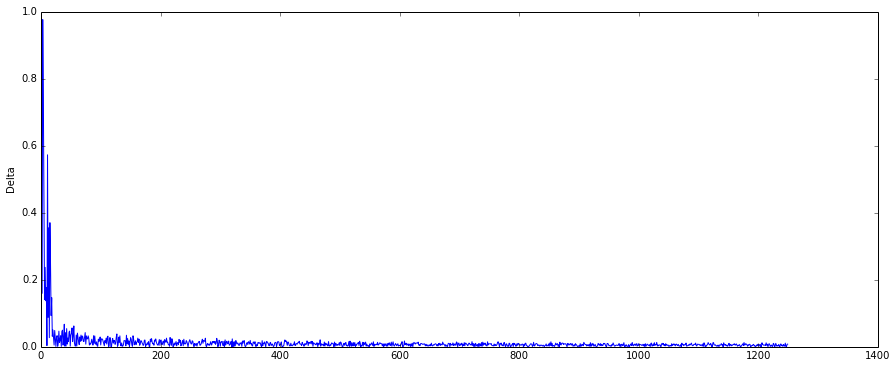

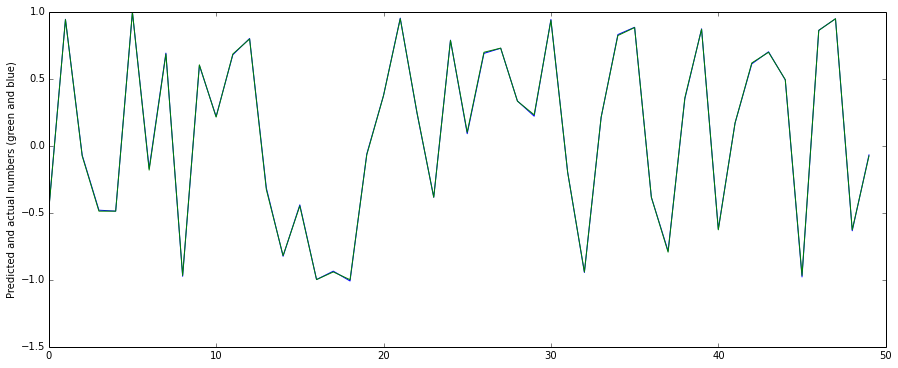

In [10]:
print('Average delta between prediction and actual: ' + str(np.mean(lossArray)))
plt.rcParams['figure.figsize'] = (15, 6)
plt.plot(lossArray)
plt.ylabel('Delta')
plt.show()

plt.ylabel('Predicted and actual numbers (green and blue)')
plt.plot(predictArray[1200:])
plt.plot(targetArray[1200:])